<a href="https://colab.research.google.com/github/venkateshsureshcks/coffee_machine/blob/main/Jamboree_Education_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import the dataset and do usual exploratory data analysis steps like checking the structure & characteristics of the dataset.**

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv"
df = pd.read_csv(url)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [52]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [55]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [56]:
df.shape[0], df.shape[1]

(500, 9)

**Drop the unique row Identifier if you see any. This step is important as you don’t want your model to build some understanding based on row numbers.**

In [57]:
df.drop(columns = 'Serial No.', inplace= True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Use Non-graphical and graphical analysis for getting inferences about variables**

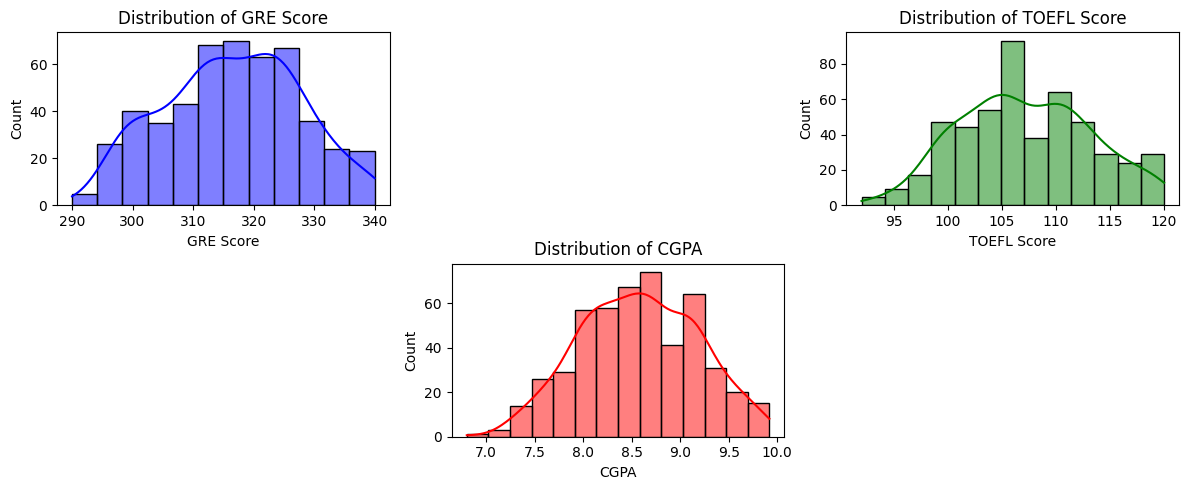

In [58]:
plt.figure(figsize=(12,5))

plt.subplot(2, 3, 1)
sns.histplot(df['GRE Score'], kde=True, color='blue')
plt.title("Distribution of GRE Score")

plt.subplot(2, 3, 3)
sns.histplot(df['TOEFL Score'], kde=True,color='green')
plt.title("Distribution of TOEFL Score")

plt.subplot(2, 3, 5)
sns.histplot(df['CGPA'], kde=True,color='red')
plt.title("Distribution of CGPA")

plt.tight_layout()
plt.show()

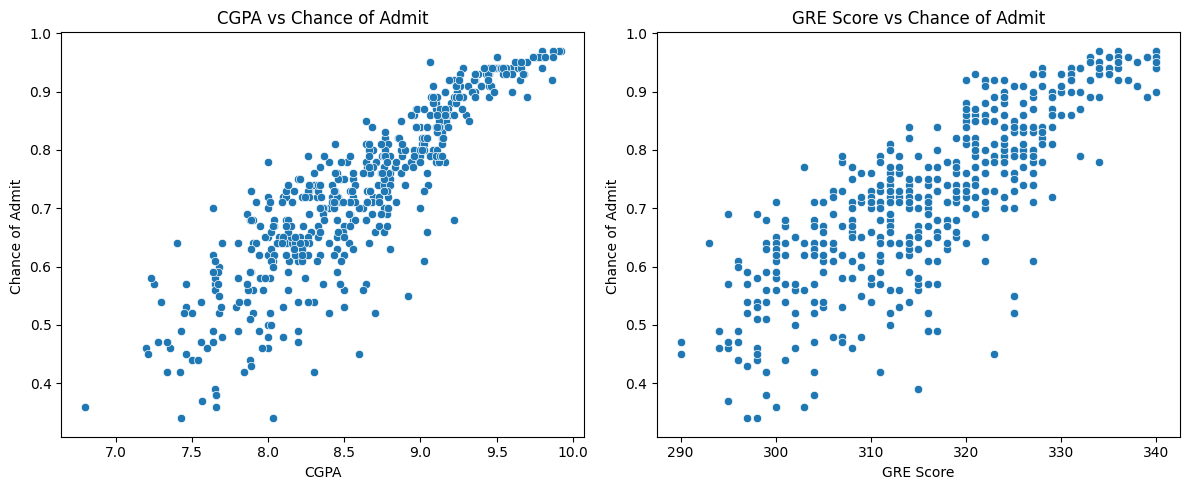

In [59]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x='CGPA', y='Chance of Admit ', data=df)
plt.title("CGPA vs Chance of Admit")

plt.subplot(1,2,2)
sns.scatterplot(x='GRE Score', y='Chance of Admit ', data=df)
plt.title("GRE Score vs Chance of Admit")

plt.tight_layout()
plt.show()


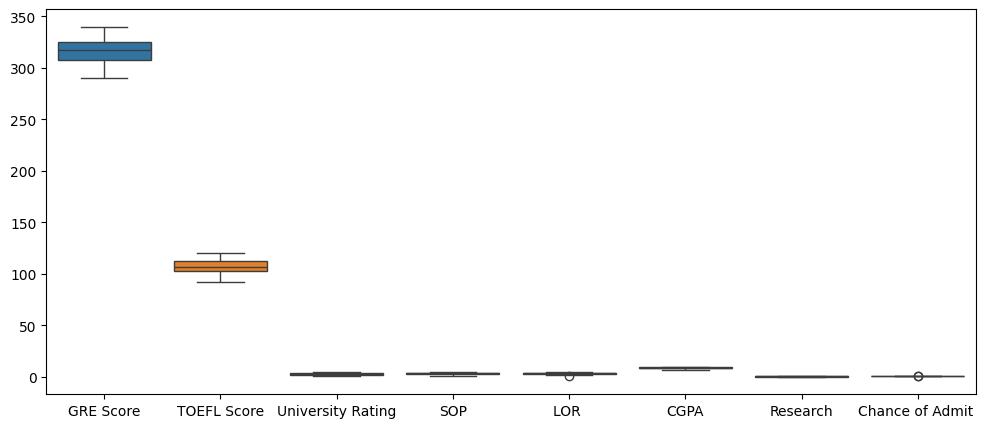

In [60]:
plt.figure(figsize=(12,5))
sns.boxplot(df.select_dtypes(include=['number']))
plt.show()

**Check correlation among independent variables and how they interact with each other.**

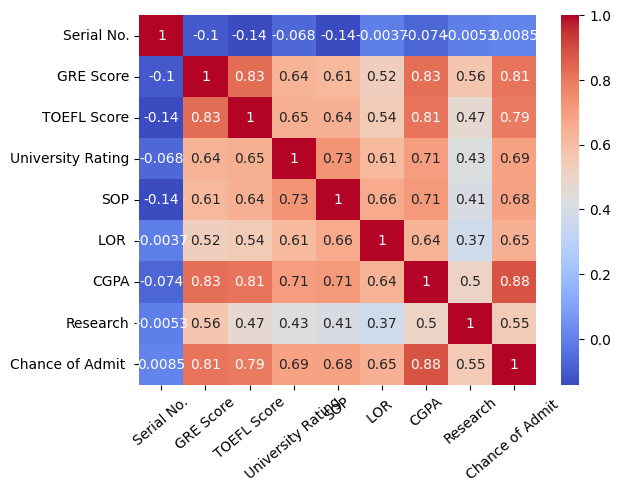

In [90]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.xticks(rotation = 40)
plt.show()

**Use Linear Regression from (Statsmodel library) and explain the results.**

In [91]:
df.columns = df.columns.str.strip()
X = df.drop(columns = 'Chance of Admit')
y = df[['Chance of Admit']]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

**Multicollinearity check by VIF score**

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Features'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data



,Features,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_copy = X.copy()
dropped_cols = []

while True:
    vif_data = pd.DataFrame()
    vif_data['Features'] = X_copy.columns
    vif_data['VIF'] = [variance_inflation_factor(X_copy.values, i) for i in range(X_copy.shape[1])]

    max_vif = vif_data['VIF'].max()
    max_feature = vif_data.loc[vif_data['VIF'].idxmax(), 'Features']

    if max_vif > 5:
        print(f"Dropping '{max_feature}' with VIF={max_vif:.2f}")
        X_copy = X_copy.drop(columns=[max_feature])
        dropped_cols.append(max_feature)
    else:
        break

print("\nDropped Columns:", dropped_cols)
print("\nFinal VIF Table:\n", vif_data)


Dropping 'GRE Score' with VIF=1308.06
Dropping 'CGPA' with VIF=728.78
Dropping 'SOP' with VIF=33.27
Dropping 'LOR' with VIF=25.70
Dropping 'University Rating' with VIF=11.84

Dropped Columns: ['GRE Score', 'CGPA', 'SOP', 'LOR', 'University Rating']

Final VIF Table:
       Features       VIF
0  TOEFL Score  2.407952
1     Research  2.407952


**Mean of residuals**

In [66]:
residuals = y_test - y_pred
print("Mean of residuals:", np.mean(residuals))


Mean of residuals: -0.005453623717661124


**Linearity of variables (no pattern in residual plot)**

In [67]:
y_pred.shape[0], residuals.shape[0], y_pred.shape[1], residuals.shape[1]

(100, 100, 1, 1)

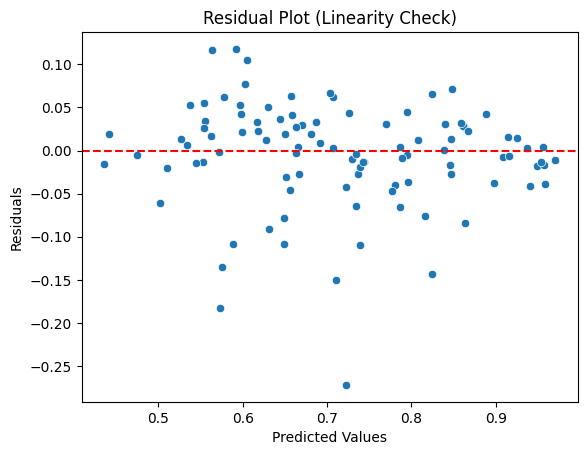

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x=np.ravel(y_pred), y= np.ravel(residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linearity Check)")
plt.show()



**Test for Homoscedasticity**

In [69]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X_sm = sm.add_constant(X_train)
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', np.float64(0.9506884043302326)),
 ('p-value', np.float64(0.6367845922443005))]

In [70]:
alpha = 0.05
if 0.6367845922443005 > alpha:
  print('Homoscedasticity satisfied')
else:
  print('Heteroscedasticity exists')

Homoscedasticity satisfied


**Normality of residuals**

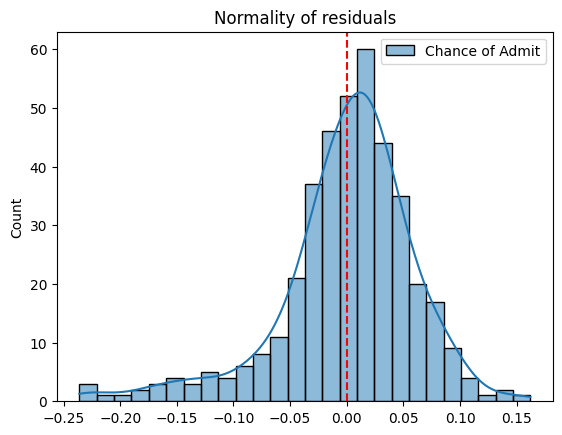

In [71]:
train_res = y_train - model.predict(X_train)
sns.histplot(train_res, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('Normality of residuals')
plt.show()

In [72]:
from scipy.stats import shapiro

stat, p = shapiro(residuals)
print("Shapiro-Wilk test p-value:", p)

if p > 0.05:
    print("Residuals are approximately normal")
else:
    print("Residuals are not normal")


Shapiro-Wilk test p-value: 1.086998046651027e-05
Residuals are not normal


**Do model evaluation- MAE, RMSE, R2 score, Adjusted R2.**

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f' MAE is {mae}')
print(f' MSE is {mse}')
print(f' RMSE is {rmse}')
print(f' R2 is {r2}')

 MAE is 0.042722654277053636
 MSE is 0.003704655398788405
 RMSE is 0.06086588041578307
 R2 is 0.8188432567829631


In [74]:
n = len(y)
p = X.shape[1]

adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R²:", adj_r2)

Adjusted R²: 0.8162658234445094


**Linear regression using VIF data**

In [75]:
X_selected = df[['TOEFL Score', 'Research']]  # low-VIF features
y = df['Chance of Admit']                     # target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)  # for assumption checks
y_pred_test = model.predict(X_test)    # for model evaluation



In [80]:
test_residuals = y_test - y_pred_test
print("test_Mean of residuals:", np.mean(test_residuals))

train_residuals = y_train - y_pred_train
print("train_Mean of residuals:", np.mean(train_residuals))


test_Mean of residuals: -0.002467886748385063
train_Mean of residuals: -2.4175106361212786e-16


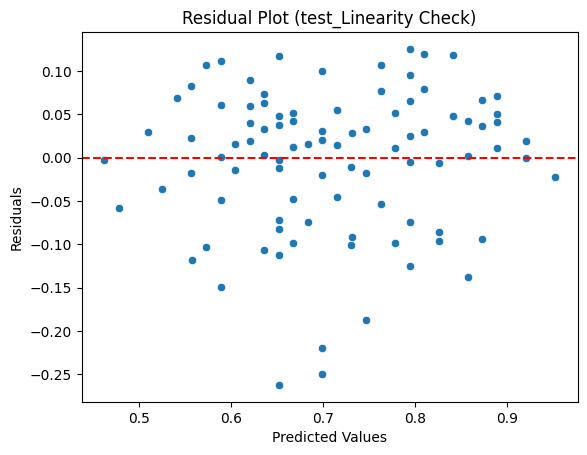

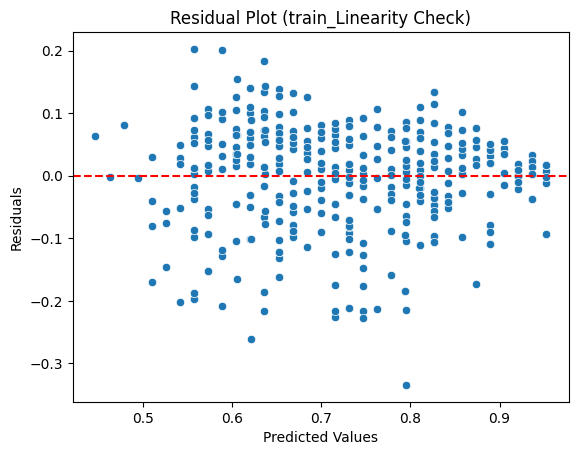

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x=np.ravel(y_pred_test), y= np.ravel(test_residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (test_Linearity Check)")
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x=np.ravel(y_pred_train), y= np.ravel(train_residuals))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (train_Linearity Check)")
plt.show()





In [84]:
from statsmodels.stats.diagnostic import het_goldfeldquandt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X_sm = sm.add_constant(X_train)
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
print(lzip(name, test))


alpha = 0.05
if 0.6367845922443005 > alpha:
  print('Homoscedasticity satisfied')
else:
  print('Heteroscedasticity exists')

[('F statistic', np.float64(1.2751025143244297)), ('p-value', np.float64(0.04444605632686707))]
Homoscedasticity satisfied


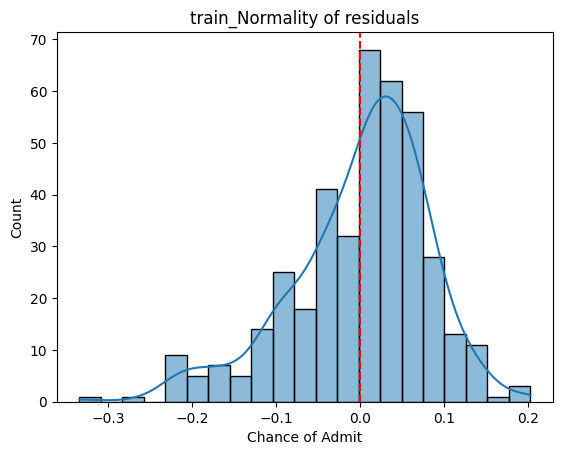

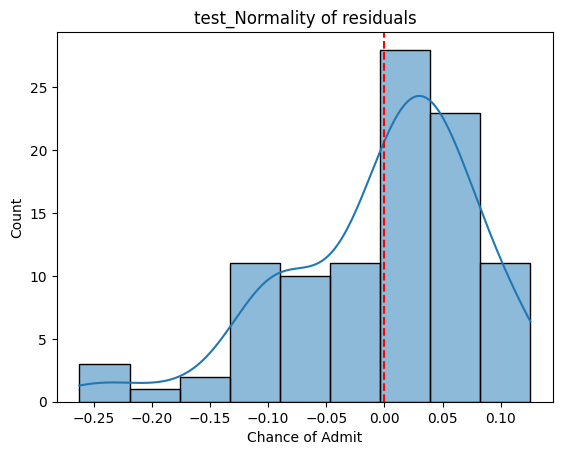

In [86]:
train_res = y_train - y_pred_train
sns.histplot(train_res, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('train_Normality of residuals')
plt.show()

train_res = y_test - y_pred_test
sns.histplot(train_res, kde=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.title('test_Normality of residuals')
plt.show()

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_train, y_pred_train)
mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_pred_train)

print(f' MAE is {mae}')
print(f' MSE is {mse}')
print(f' RMSE is {rmse}')
print(f' R2 is {r2}')

 MAE is 0.06282011177919421
 MSE is 0.006654762064024671
 RMSE is 0.08157672501409131
 R2 is 0.6623459813901373


In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)

print(f' MAE is {mae}')
print(f' MSE is {mse}')
print(f' RMSE is {rmse}')
print(f' R2 is {r2}')

 MAE is 0.06237185210161604
 MSE is 0.006470209110961935
 RMSE is 0.08043761005252416
 R2 is 0.6836083564321793
